In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

# download files needed for nltk
nltk.download('punkt')
nltk.download('stopwords')

tweets_csv = pd.read_csv("tweets.csv")

tweets = tweets_csv["text"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
word_count = dict()

# Taken from https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/
def clean_tweet(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

for index, tweet in tweets.iteritems():
    # No clue why, but this print statement has to be here or tweet.split() will throw an error
    print(tweet)
    words = nltk.word_tokenize(clean_tweet(tweet.lower()))
    filtered_words = [word for word in words if not word.lower() in stopwords.words('english')]
    for word in filtered_words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?
Clinton: Trump should’ve apologized more, attacked less https://t.co/eJampkoHFZ
RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet)
RT @jww372: I don't have to guess your religion! #ChristmasAftermath
RT @Shareblue: Pence and his lawyers decided which of his official emails the public could see

https://t.co/HjhPguBK1Y by @alisonrose711
@ModicaGiunta me, too!
RT @MDBlanchfield: You’ll never guess who tweeted something false that he saw on TV - The Washington Post https://t.co/K2e4XdXRfu
RT @100PercFEDUP: New post: WATCH: DIAMOND AND SILK Rip On John Kerry Over Israel Comments (VIDEO) https://t.co/NkdKaQ9yYu
RT @AriaWilsonGOP: 3 Women Face Charges After Being Caught Stealing Dozens Of Trump Signs https://t.co/JjlZxaW3JN https://t.co/qW2Ok9ROxH
One of the ways to remind that #BlackLivesMatter #BlackPressDay
RT @ElPenguinito: #myfarewellwordswould

In [6]:
filtered_count = {k:v for (k,v) in word_count.items() if len(k) > 2 and v >= 100}
sorted_count = sorted(filtered_count.items(), key=lambda x:x[1], reverse=True )

for key, count in sorted_count:
    print(key + " " + str(count))

trump 2092
n't 1017
clinton 873
hillary 813
amp 733
obama 671
people 534
... 441
like 408
new 404
get 368
donald 366
one 338
politics 336
news 334
via 310
america 283
president 278
tcot 270
https 270
make 256
would 246
vote 244
're 243
time 241
says 237
know 234
want 229
day 225
pjnet 220
black 217
election 215
see 214
think 210
maga 206
good 206
say 206
never 206
need 199
video 199
love 199
gop 196
media 194
campaign 192
right 188
take 175
going 172
let 171
world 166
life 166
got 166
white 165
back 163
man 160
first 159
still 156
really 151
support 149
great 148
today 148
could 146
country 145
police 145
said 145
state 143
stop 143
american 142
every 141
'll 138
watch 137
bill 136
isis 136
show 134
women 134
real 132
years 132
debate 129
god 129
https… 128
best 127
always 126
post 125
last 124
way 124
help 123
live 121
free 120
dnc 118
muslim 117
ccot 117
much 117
http… 115
ever 112
breaking 109
another 109
've 108
die 108
win 107
even 107
must 106
year 105
merkelmussbleiben 105
look 

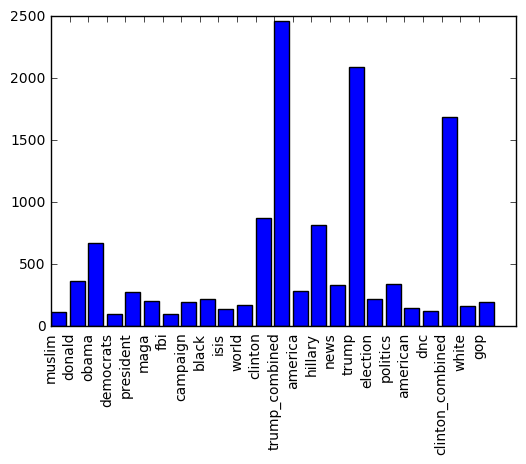

In [4]:
selected = {
    'trump' : filtered_count["trump"],
    'clinton' : filtered_count["clinton"],
    'hillary' : filtered_count["hillary"],
    'obama': filtered_count["obama"],
    'donald': filtered_count["donald"],
    'politics': filtered_count["politics"],
    'news': filtered_count["news"],
    'america': filtered_count["america"],
    'president': filtered_count["president"],
    'black': filtered_count["black"],
    'election': filtered_count["election"],
    'gop': filtered_count["gop"],
    'maga': filtered_count["maga"],
    'campaign': filtered_count["campaign"],
    'world': filtered_count["world"],
    'white': filtered_count["white"],
    'american': filtered_count["american"],
    'dnc': filtered_count["dnc"],
    'muslim': filtered_count["muslim"],
    'fbi': filtered_count["fbi"],
    'democrats': filtered_count["democrats"],
    'isis': filtered_count["isis"],
    'clinton_combined':filtered_count["hillary"] + filtered_count["clinton"],
    'trump_combined': filtered_count["trump"] + filtered_count["donald"]
}

plt.bar(range(len(selected)), selected.values())
plt.xticks(range(len(selected)), selected.keys(), rotation="vertical")
plt.show()

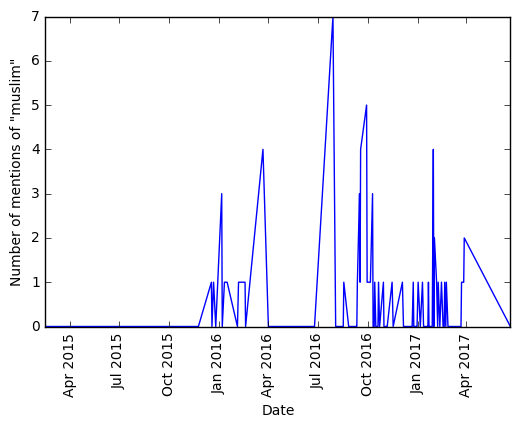

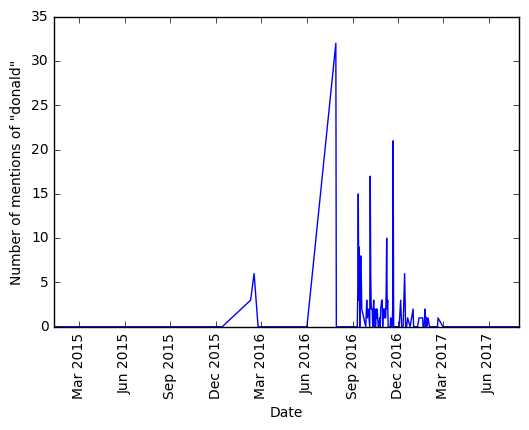

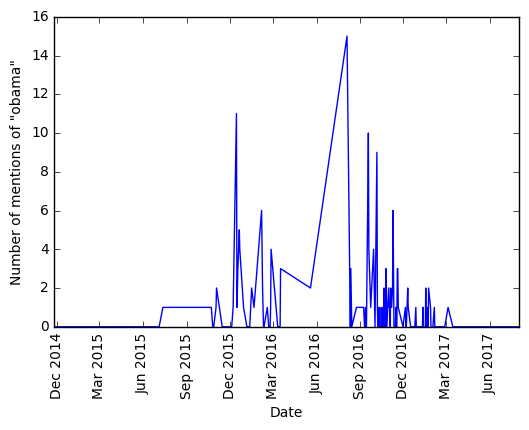

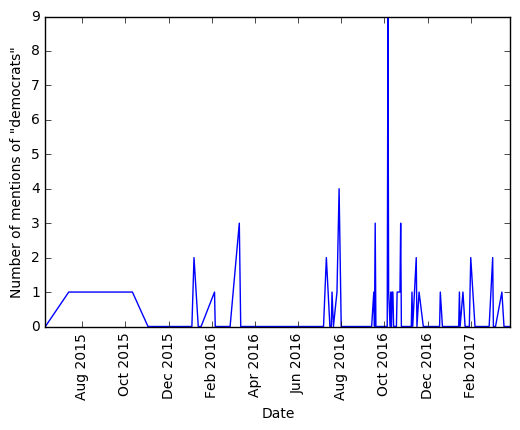

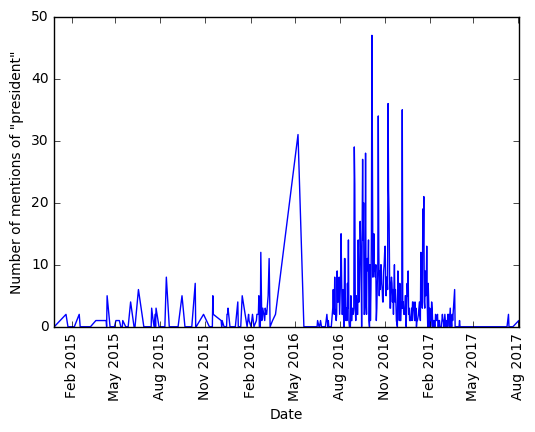

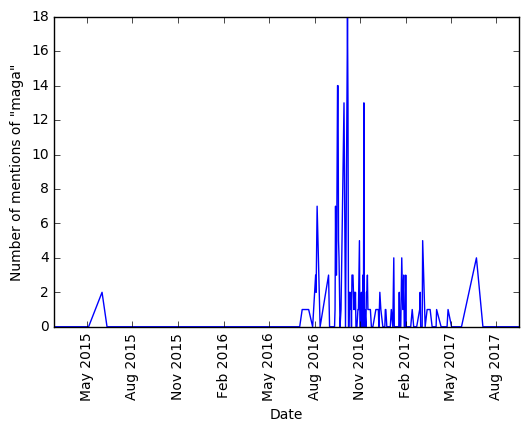

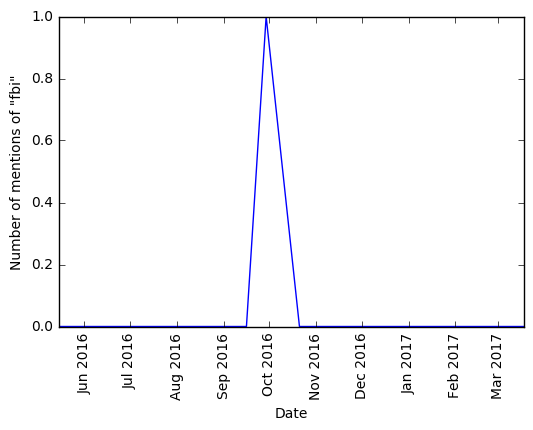

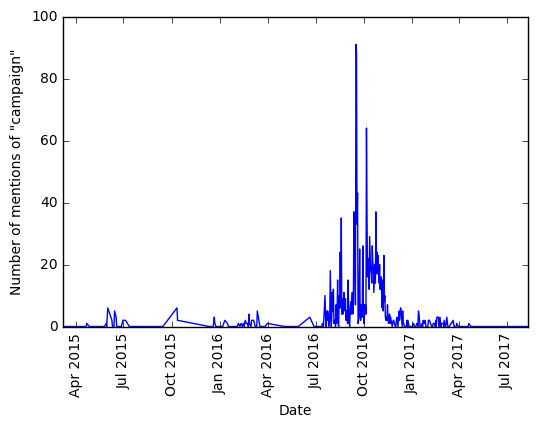

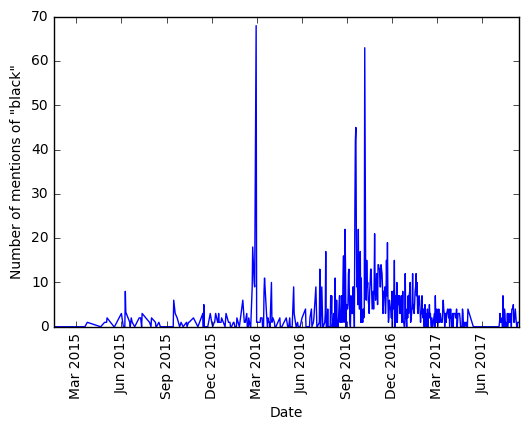

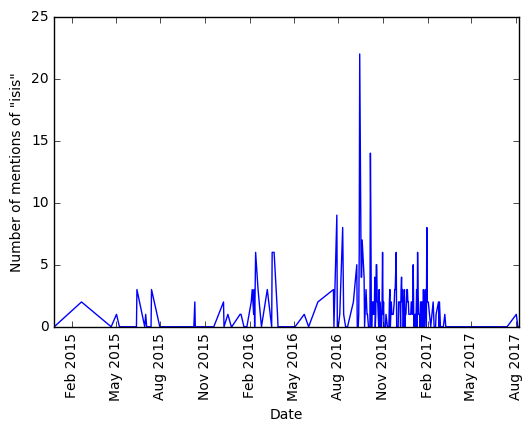

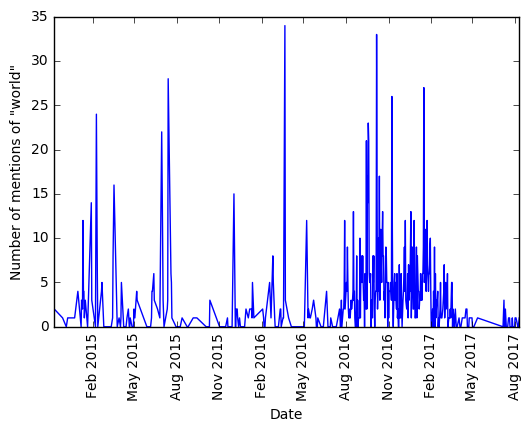

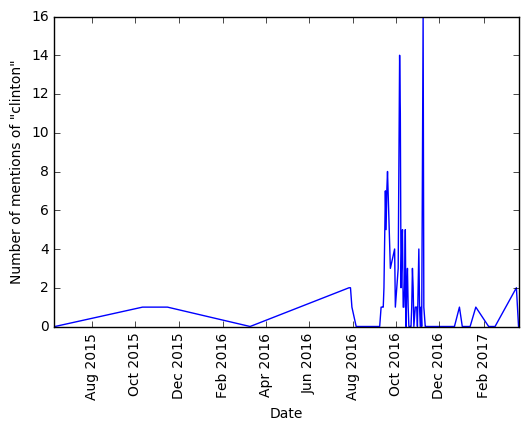

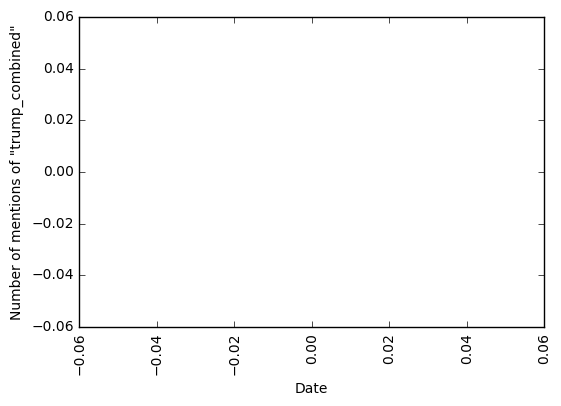

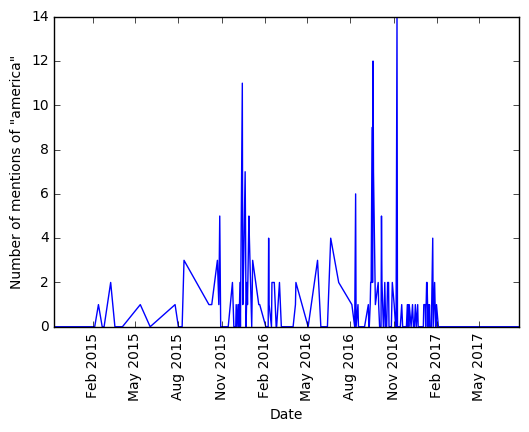

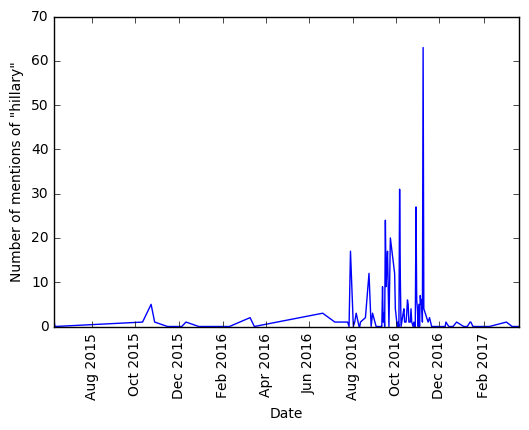

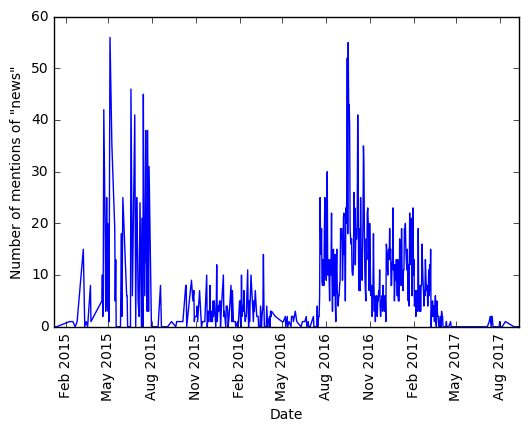

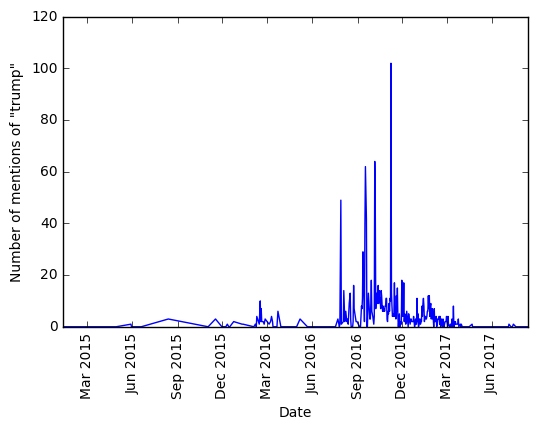

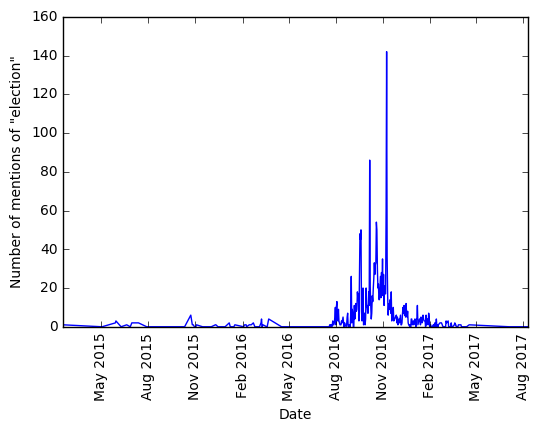

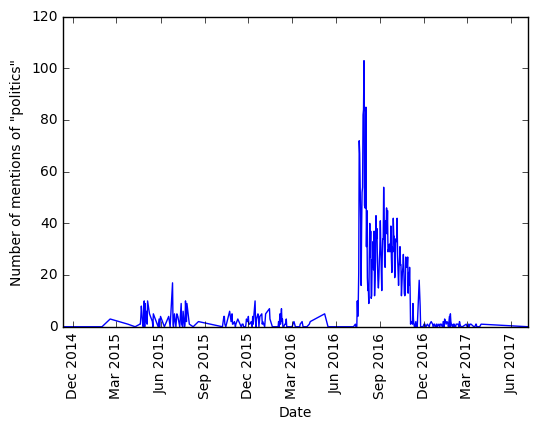

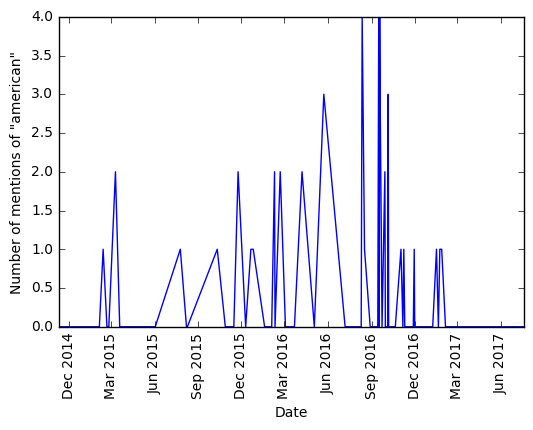

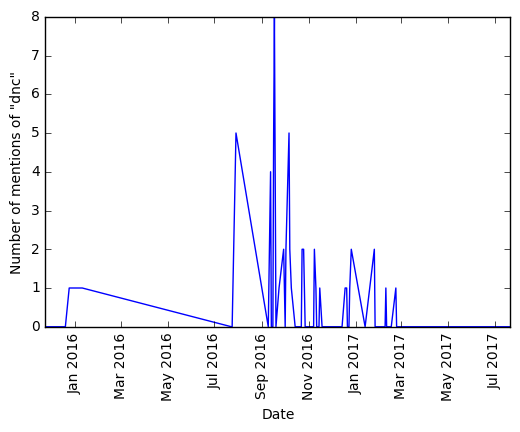

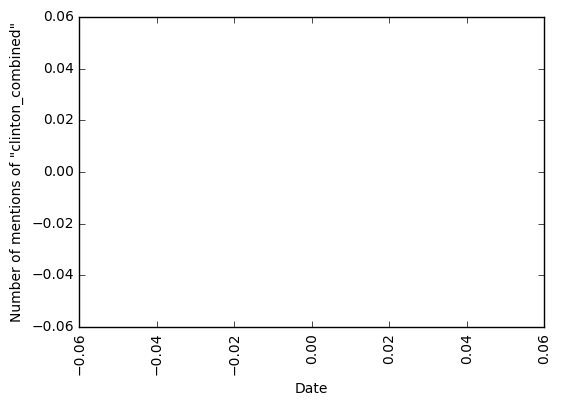

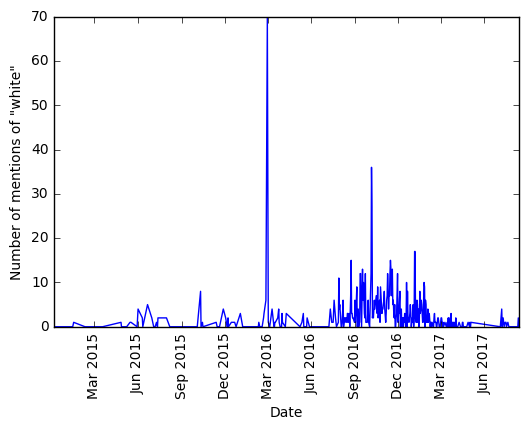

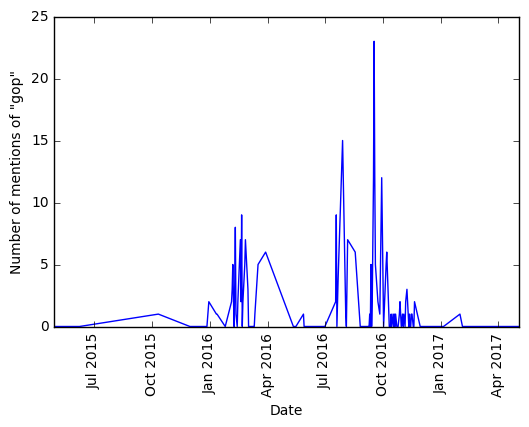

In [8]:
import datetime

def GetDates(word):
    datesFrame = tweets_csv[tweets_csv['text'].str.contains(word) == True]

    dateCount = dict()

    for index, date in datesFrame['created_str'].iteritems():
        slist = date[0:10].split('-')
        sdate = datetime.date(int(slist[0]), int(slist[1]), int(slist[2]))
    
        if (sdate in dateCount):
            dateCount[sdate] += 1
        else:
            dateCount[sdate] = 0
        
    orderDateCount = sorted(dateCount.items(), key=lambda x:x[0], reverse=True)
    return orderDateCount

def PlotMentions(dates, word):
    x_val = [x[0] for x in dates]
    y_val = [x[1] for x in dates]
    
    plt.plot(x_val, y_val)
    plt.xticks(rotation=90)
    plt.ylabel("Number of mentions of \"" + word + "\"")
    plt.xlabel("Date")
    plt.show()
    
for word in selected.keys():
    PlotMentions(GetDates(word), word)

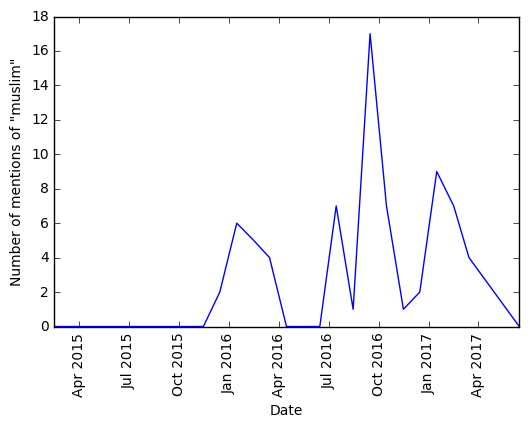

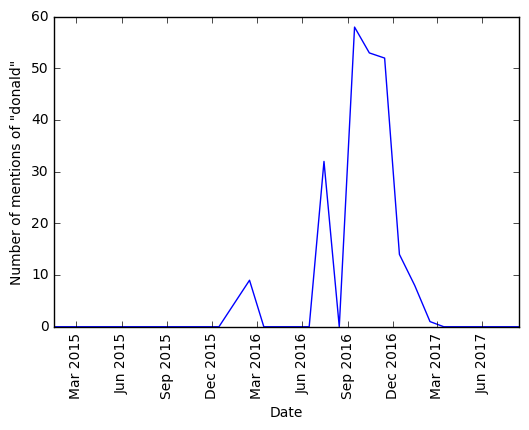

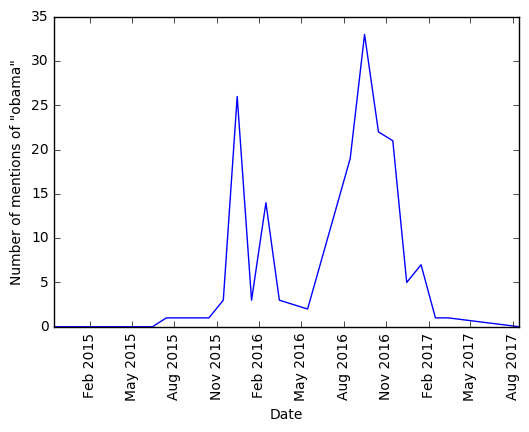

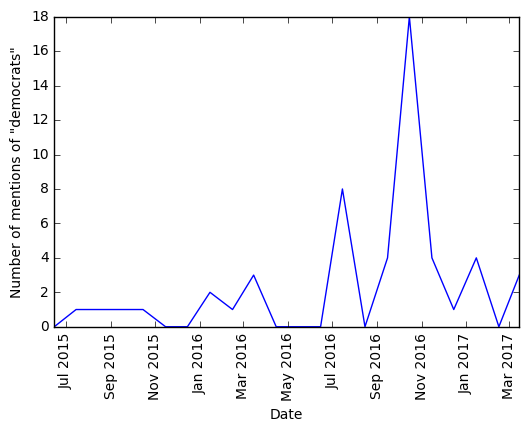

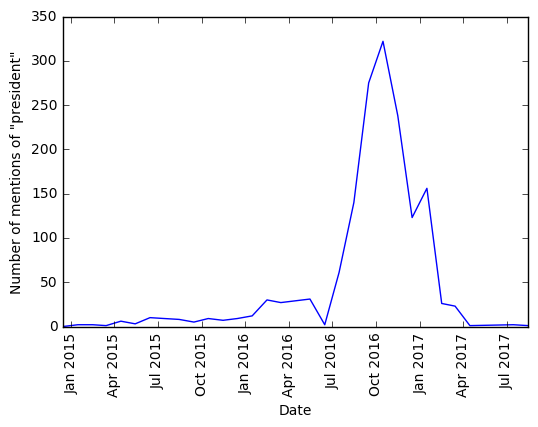

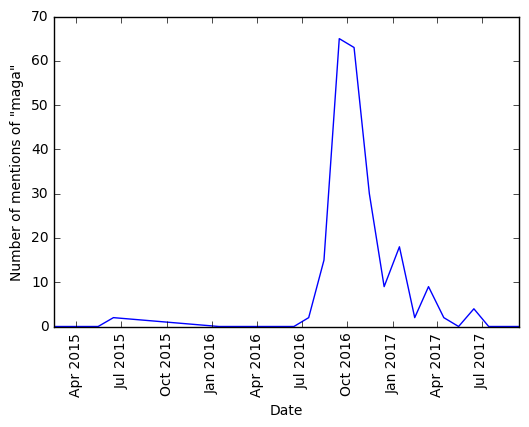

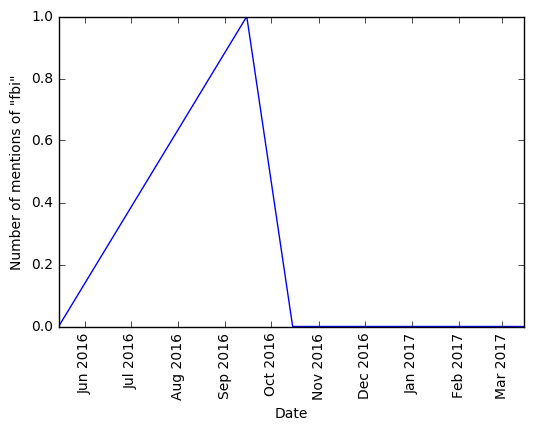

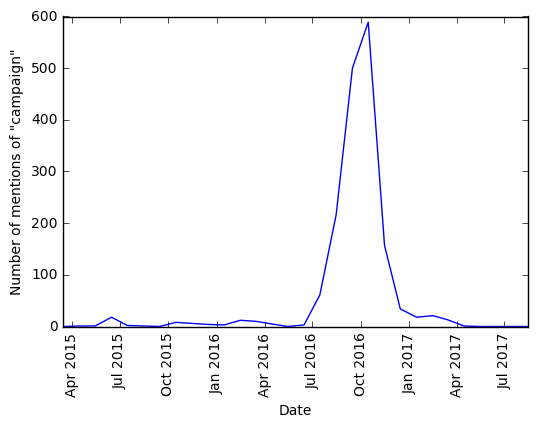

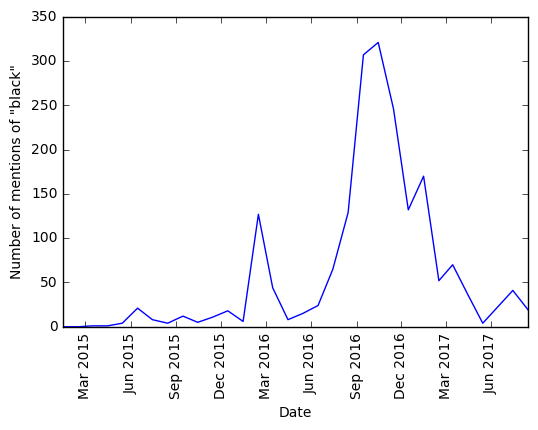

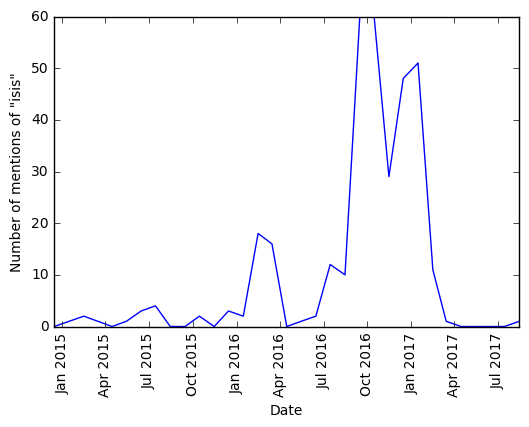

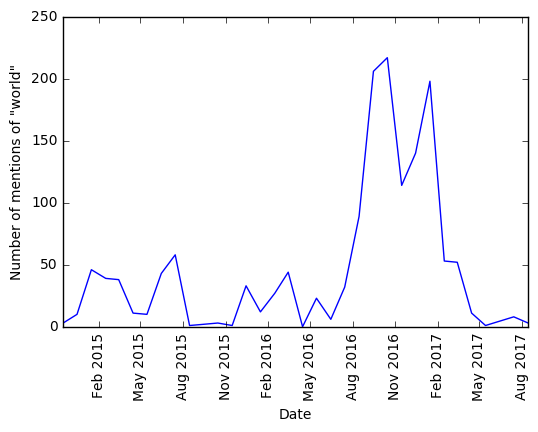

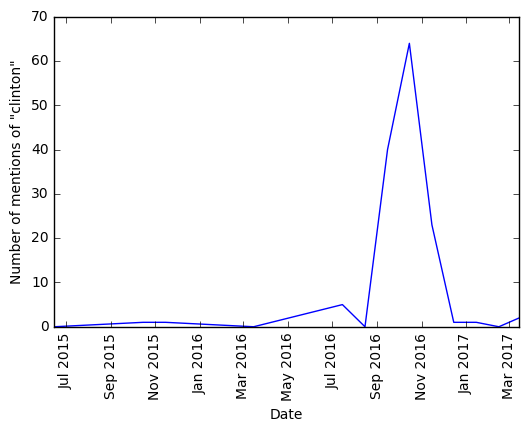

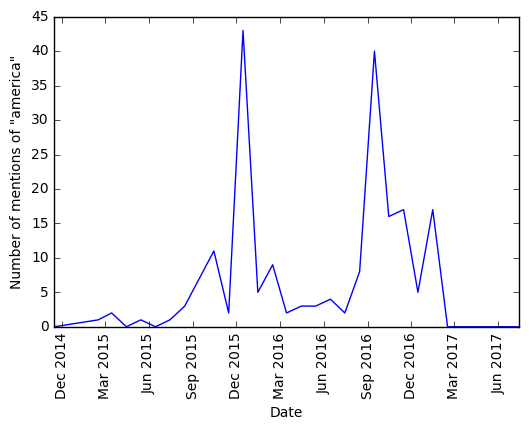

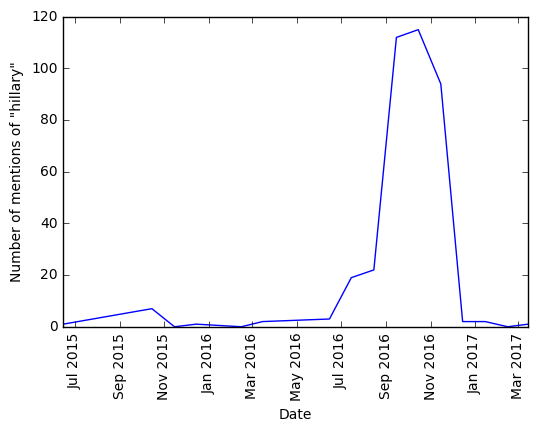

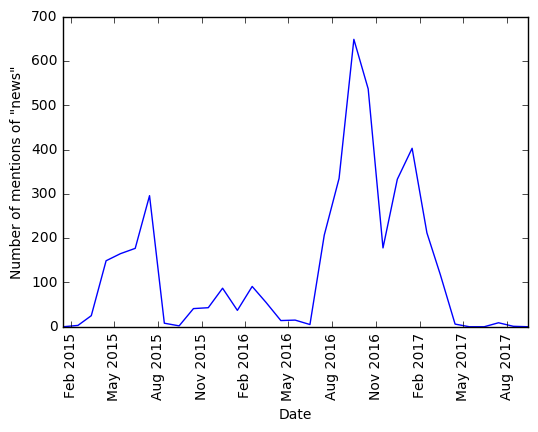

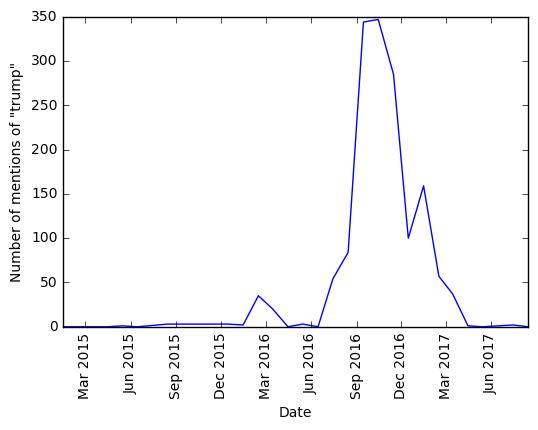

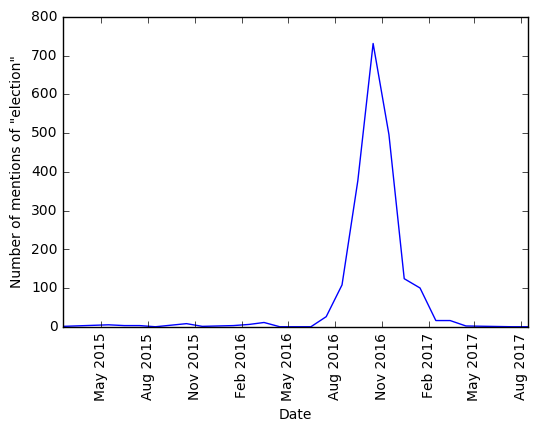

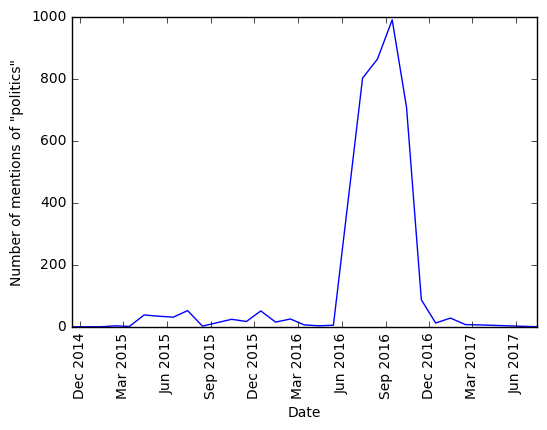

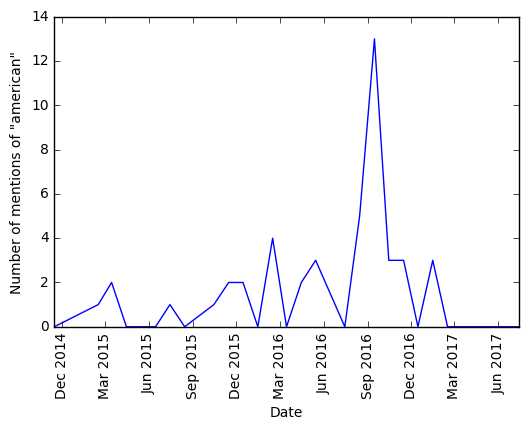

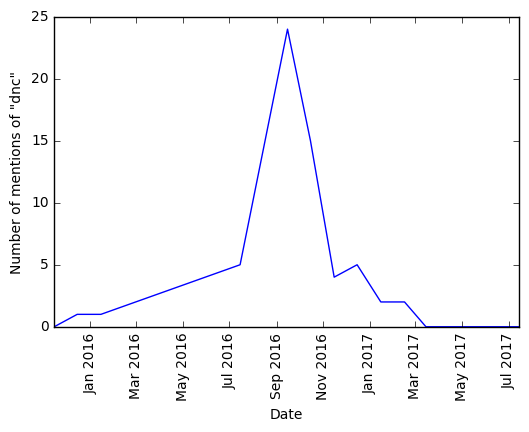

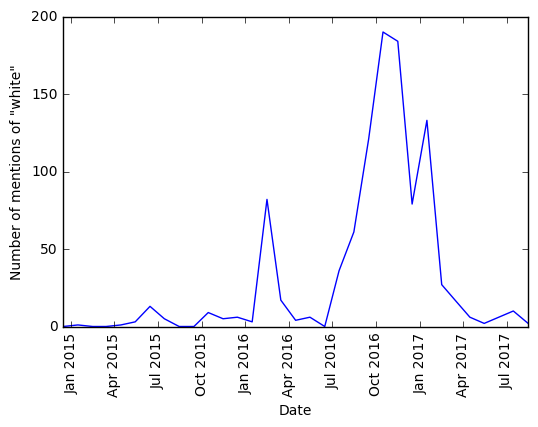

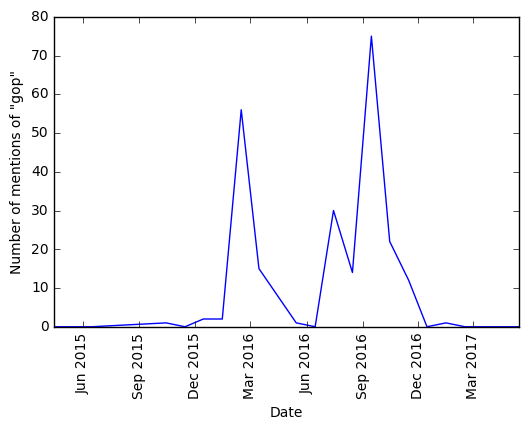

In [17]:
def PlotMentionsByMonth(dates, word):
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    
    if (len(dates) > 0):
        hist = dict()
    
        for date in dates:
            #print(date)
            year = date[0].year
            month = date[0].month
            day = 15
            
            if datetime.date(year, month, day) in hist:
                hist[datetime.date(year, month, day)] += date[1]
            else:
                hist[datetime.date(year, month, day)] = date[1]
        
        orderDateCount = sorted(hist.items(), key=lambda x:x[0], reverse=True)
        
        x_val = [x[0] for x in orderDateCount]
        y_val = [x[1] for x in orderDateCount]
        
        plt.plot(x_val, y_val)
        plt.xticks(rotation=90)
        plt.ylabel("Number of mentions of \"" + word + "\"")
        plt.xlabel("Date")
        plt.show()
    
for word in selected.keys():
    PlotMentionsByMonth(GetDates(word), word)

Mean: 0.0424554264077 variance: 0.0922380852631 Overall sentiment: 4.9672848897


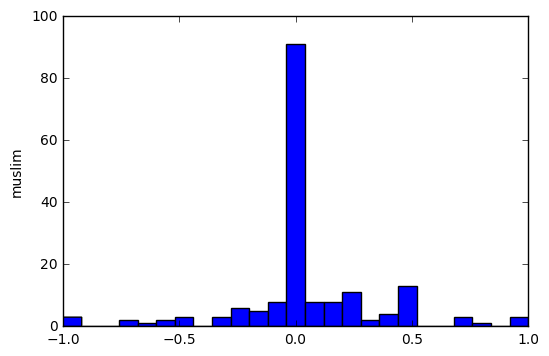

Mean: -0.0122650852409 variance: 0.0625534941935 Overall sentiment: -4.48902119818


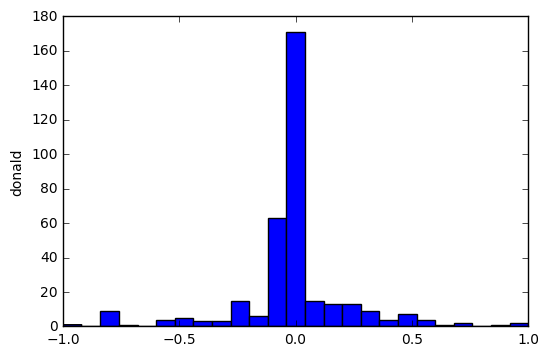

Mean: -0.00132873464184 variance: 0.0760139694051 Overall sentiment: -0.891580944676


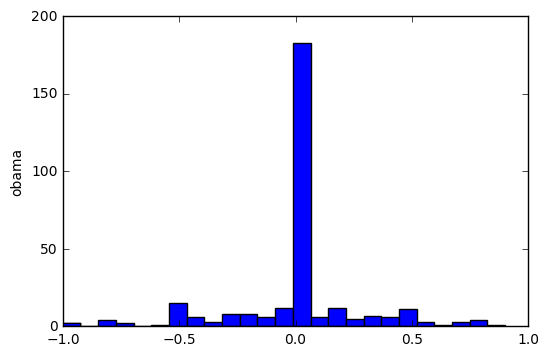

Mean: 0.0263831022863 variance: 0.100318591165 Overall sentiment: 2.63831022863


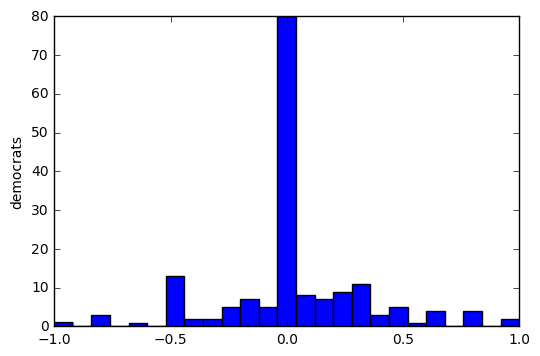

Mean: 0.0676199362206 variance: 0.0864117712564 Overall sentiment: 18.7983422693


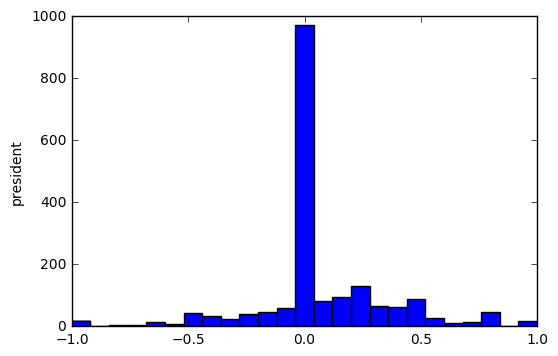

Mean: 0.0241295414251 variance: 0.0708899156148 Overall sentiment: 4.97068553356


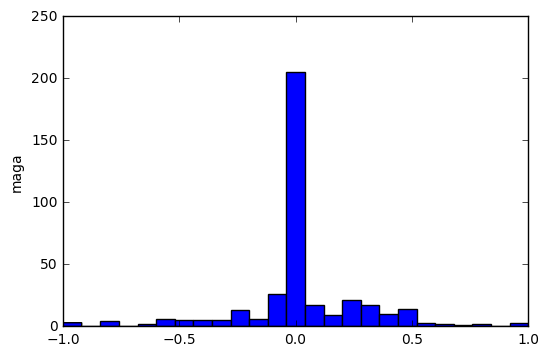

Mean: 0.024358974359 variance: 0.00712031558185 Overall sentiment: 2.46025641026


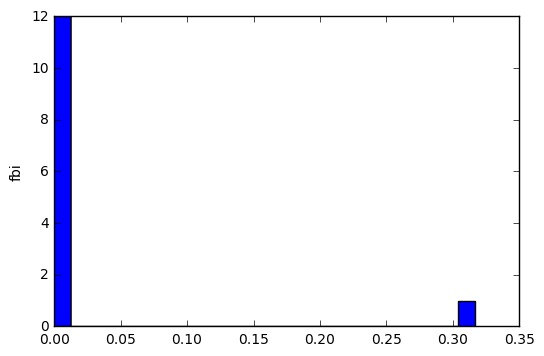

Mean: 0.0354880724736 variance: 0.0560913682928 Overall sentiment: 6.81370991493


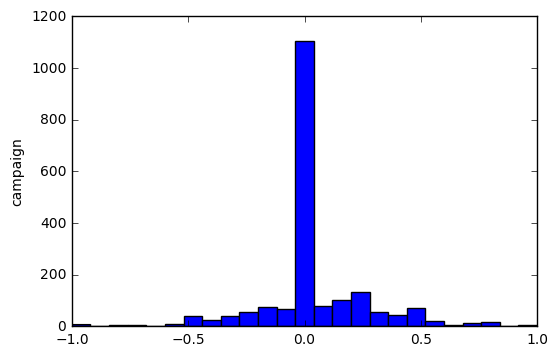

Mean: -0.0254851305585 variance: 0.0512105164933 Overall sentiment: -5.5302733312


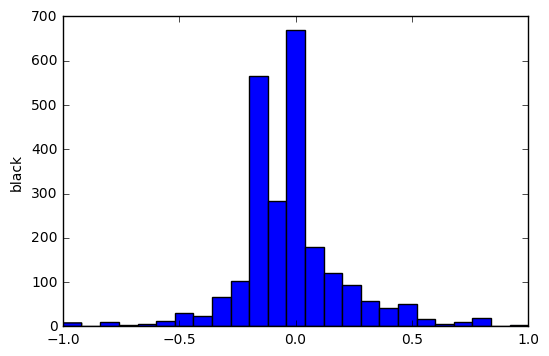

Mean: 0.0062841403404 variance: 0.0428400985191 Overall sentiment: 0.854643086295


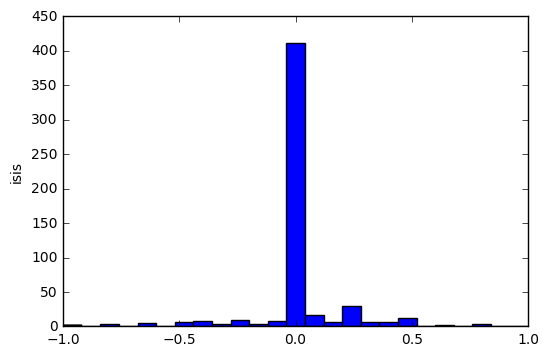

Mean: 0.0637574904281 variance: 0.0943505806772 Overall sentiment: 10.5837434111


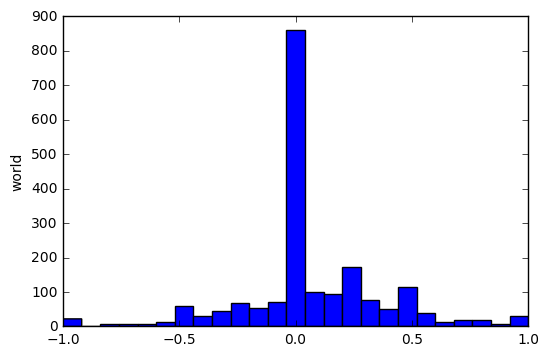

Mean: -0.00768802820805 variance: 0.075241245018 Overall sentiment: -6.71164862563


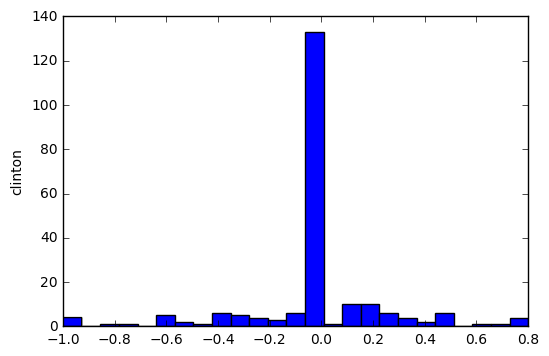

Mean: 0.0459881973109 variance: 0.0794671287446 Overall sentiment: 13.014659839


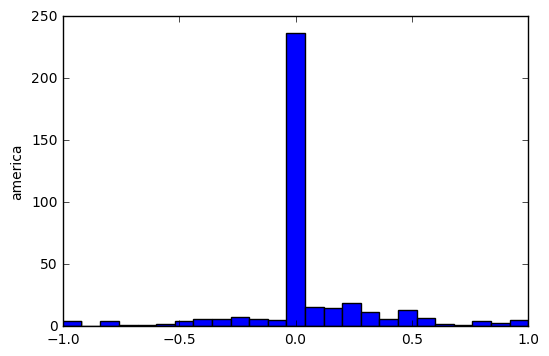

Mean: -0.00422517261831 variance: 0.0606854579727 Overall sentiment: -3.43506533868


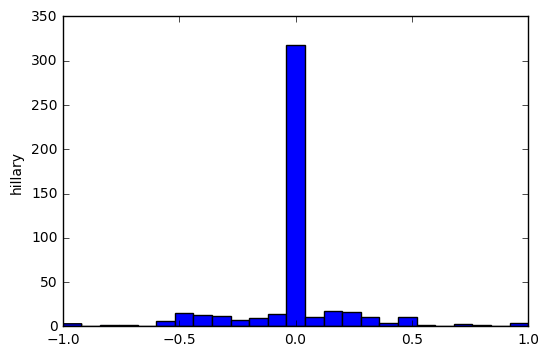

Mean: 0.0266084617266 variance: 0.0730671868862 Overall sentiment: 8.8872262167


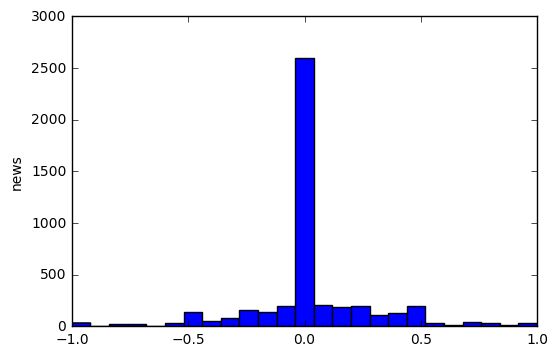

Mean: 0.0314469217283 variance: 0.0823674890735 Overall sentiment: 65.7869602557


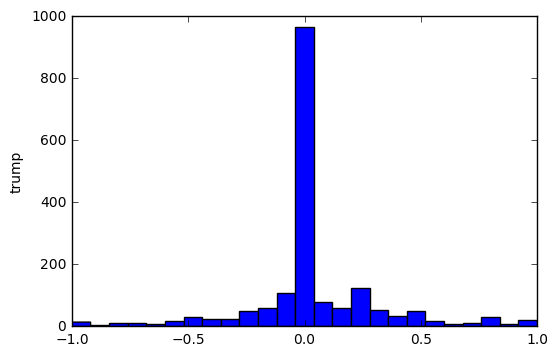

Mean: 0.0523797821638 variance: 0.0785250174084 Overall sentiment: 11.2616531652


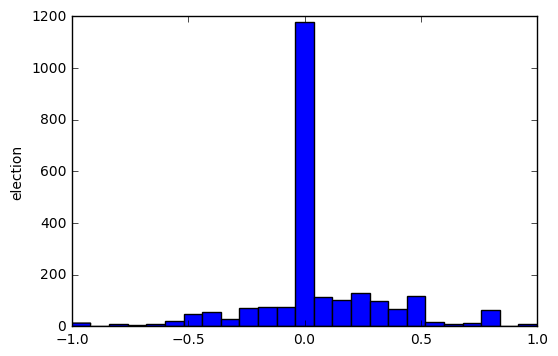

Mean: 0.0310977318761 variance: 0.0552529313917 Overall sentiment: 10.4488379104


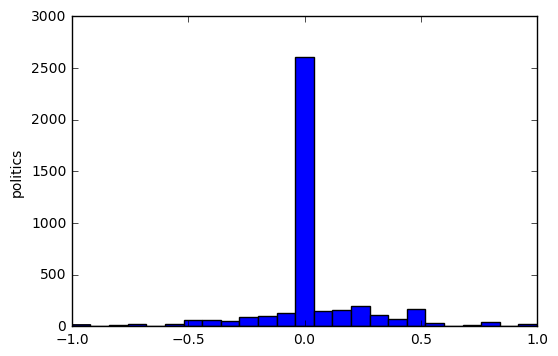

Mean: 0.060812021312 variance: 0.0845801055863 Overall sentiment: 8.63530702631


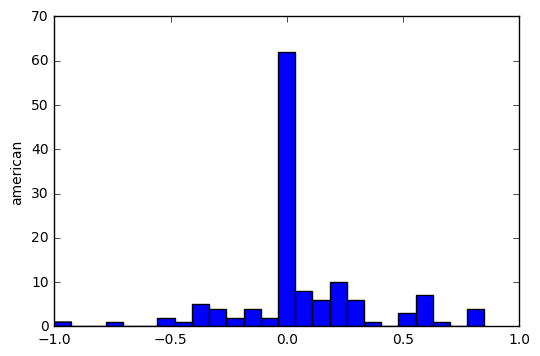

Mean: 0.0544479496075 variance: 0.0729671288923 Overall sentiment: 6.42485805369


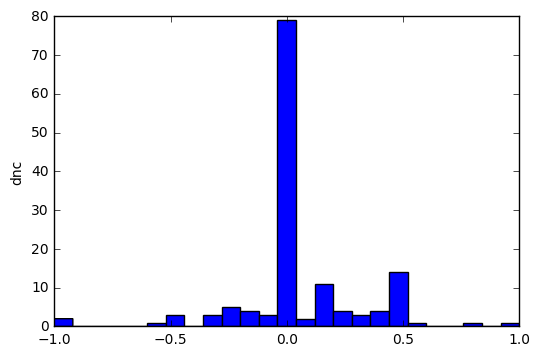

Mean: 0.0244202947387 variance: 0.0320775680555 Overall sentiment: 4.02934863189


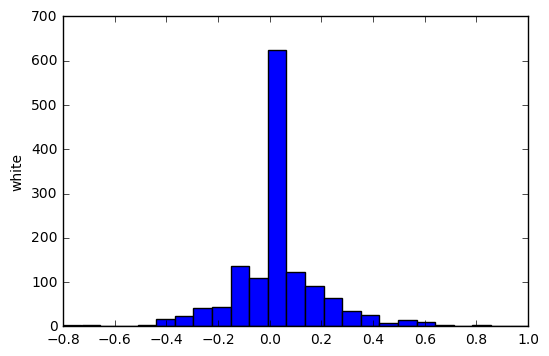

Mean: 0.00381809076173 variance: 0.0566726381309 Overall sentiment: 0.7483457893


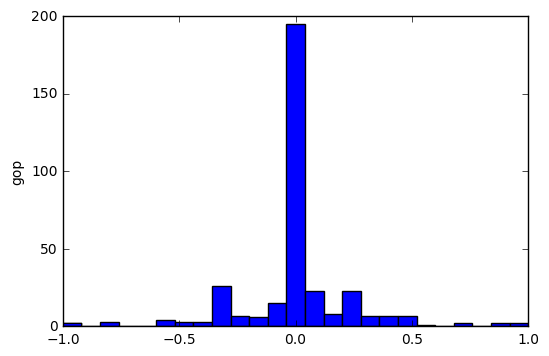

In [19]:
from textblob import TextBlob
                               
def sentiment(word):
    tweets = tweets_csv[tweets_csv['text'].str.contains(word) == True]
                               
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        analysis = TextBlob(clean_tweet(tweet))
        sentiment.append(analysis.sentiment.polarity)
    
    return sentiment

def PlotSentiment(word):
    sent = sentiment(word)
    if (len(sent) != 0):
        print("Mean: " + str(np.mean(sent)) + " variance: " + str(np.var(sent)) + " Overall sentiment: " + str(np.mean(sent)*selected[word]))
        plt.hist(sent, bins=25)
        plt.ylabel(word)
        plt.show()

for word in selected:
    PlotSentiment(word)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     5.887
Date:                Sun, 29 Apr 2018   Prob (F-statistic):             0.0170
Time:                        20:10:09   Log-Likelihood:                -10.365
No. Observations:                 105   AIC:                             24.73
Df Residuals:                     103   BIC:                             30.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1975      0.099     -1.994      0.0

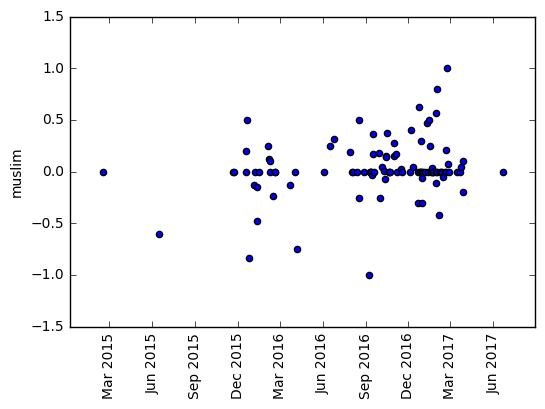

Mean: 0.0157657216343 variance: 0.0558216207279


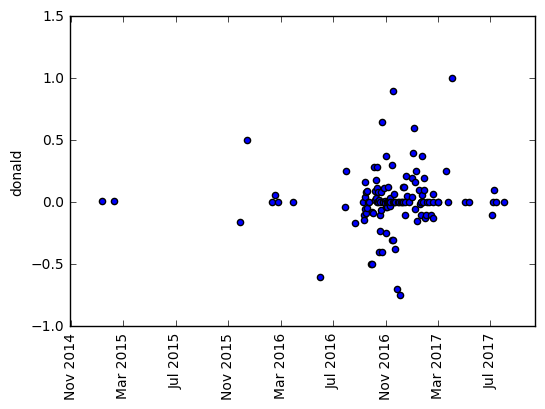

Mean: -0.00706889063017 variance: 0.0769872590612


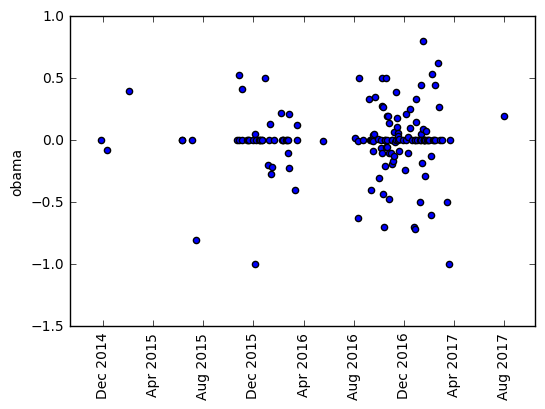

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.928
Date:                Sun, 29 Apr 2018   Prob (F-statistic):              0.168
Time:                        20:10:17   Log-Likelihood:                -18.571
No. Observations:                 123   AIC:                             41.14
Df Residuals:                     121   BIC:                             46.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1014      0.085     -1.199      0.2

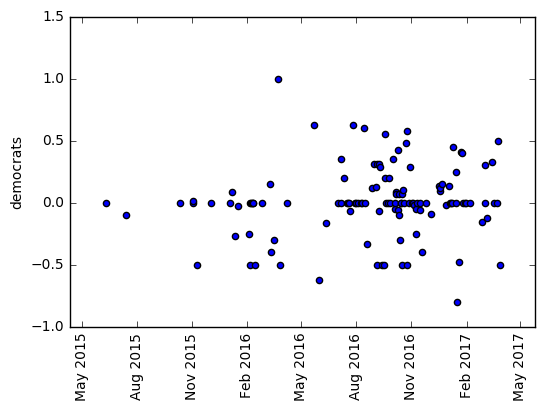

Mean: 0.0473197878457 variance: 0.0548186268457


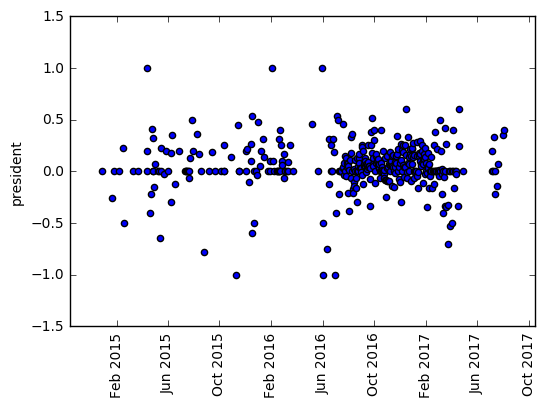

Mean: 0.0369878751621 variance: 0.0549968496103


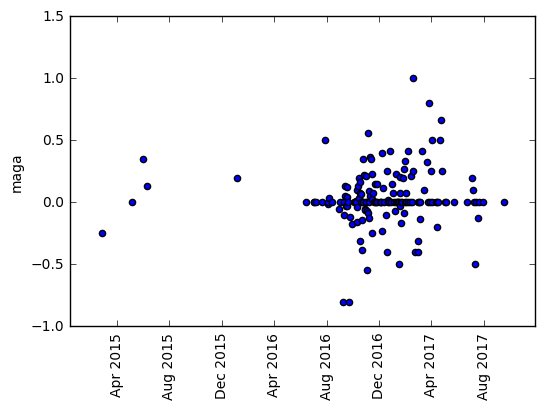

C:\Users\Chris\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     7.502
Date:                Sun, 29 Apr 2018   Prob (F-statistic):             0.0209
Time:                        20:10:39   Log-Likelihood:                 15.562
No. Observations:                  12   AIC:                            -27.12
Df Residuals:                      10   BIC:                            -26.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1508      0.050      3.016      0.0

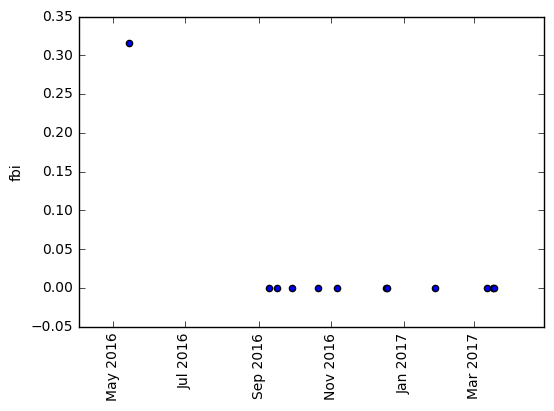

Mean: 0.0512878884615 variance: 0.0228364188828


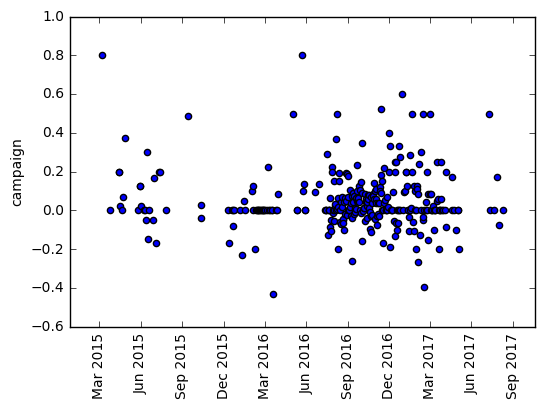

Mean: -0.0147965831446 variance: 0.023590536738


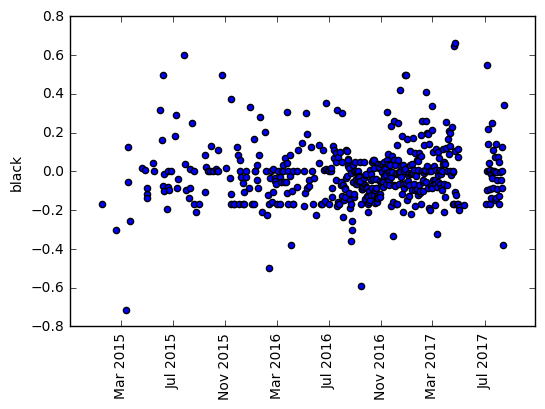

Mean: 0.00825699397337 variance: 0.0369240334967


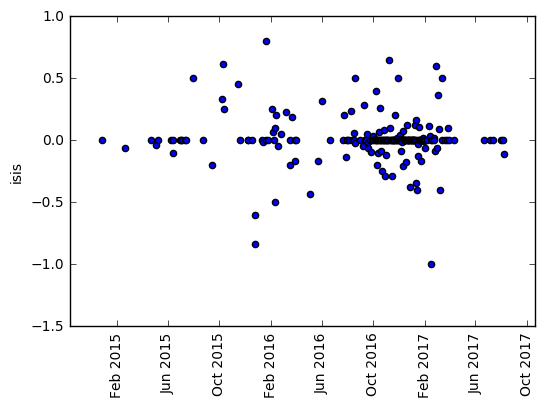

Mean: 0.0730246647017 variance: 0.0474151046651


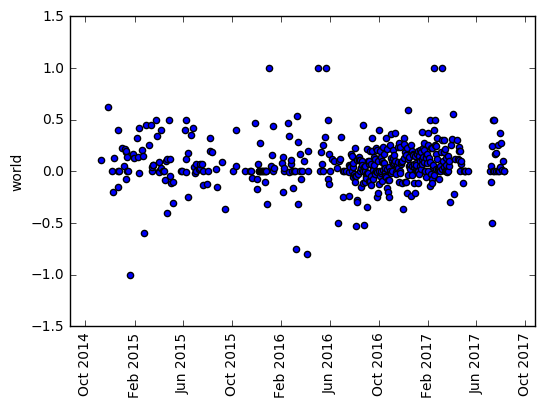

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.047
Date:                Sun, 29 Apr 2018   Prob (F-statistic):              0.309
Time:                        20:11:42   Log-Likelihood:                 14.155
No. Observations:                  78   AIC:                            -24.31
Df Residuals:                      76   BIC:                            -19.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0991      0.101      0.978      0.3

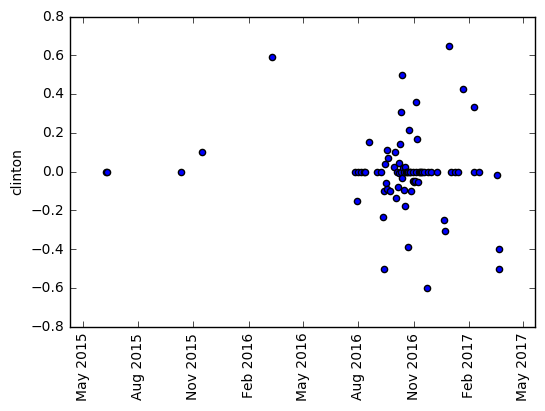

Mean: 0.0392896217823 variance: 0.0745464528508


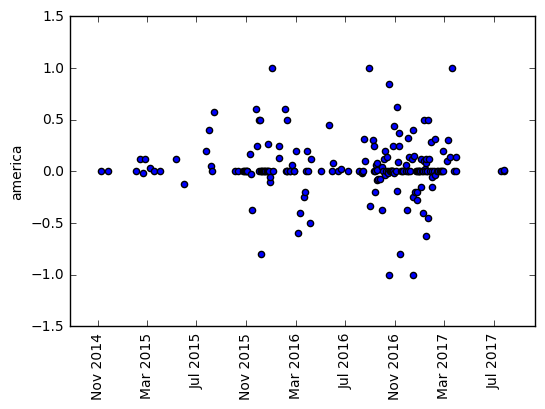

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.810
Date:                Sun, 29 Apr 2018   Prob (F-statistic):             0.0967
Time:                        20:11:49   Log-Likelihood:                 32.351
No. Observations:                 105   AIC:                            -60.70
Df Residuals:                     103   BIC:                            -55.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0904      0.066     -1.361      0.1

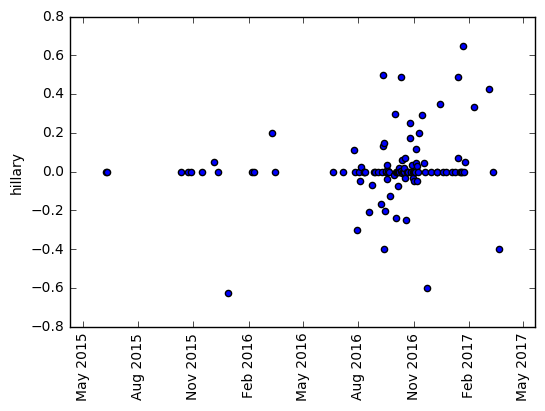

Mean: 0.038097084243 variance: 0.041598529188


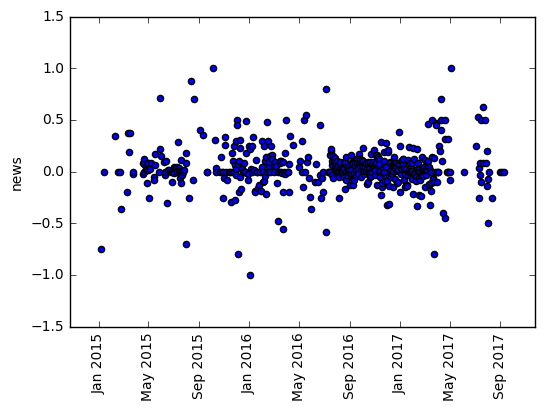

Mean: 0.0297256137082 variance: 0.0410653787303


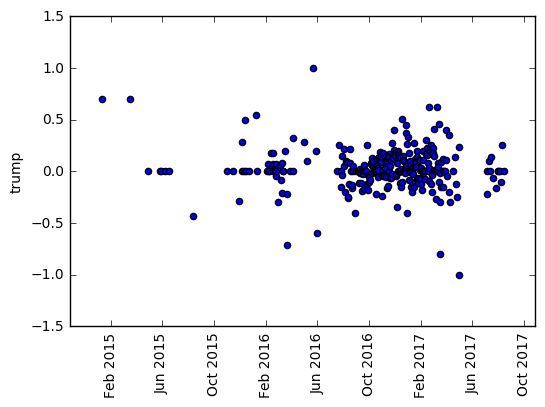

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     7.869
Date:                Sun, 29 Apr 2018   Prob (F-statistic):            0.00536
Time:                        20:13:19   Log-Likelihood:                 38.941
No. Observations:                 299   AIC:                            -73.88
Df Residuals:                     297   BIC:                            -66.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1851      0.045      4.134      0.0

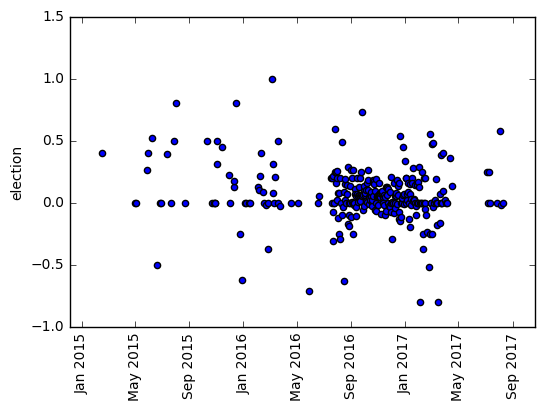

Mean: 0.0355979823927 variance: 0.0377950871743


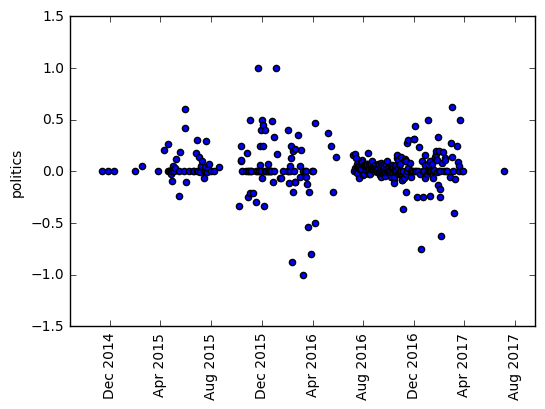

Mean: 0.051532764621 variance: 0.0816988436371


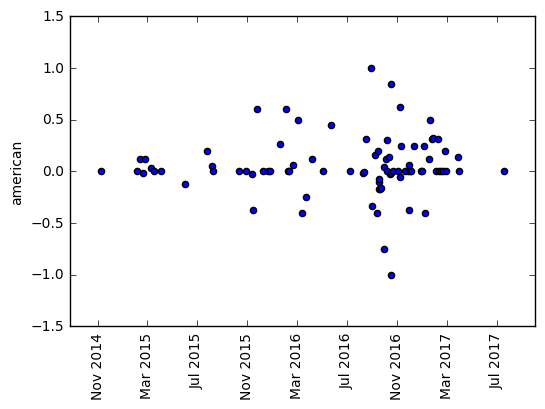

Mean: 0.0593923996058 variance: 0.0839656603836


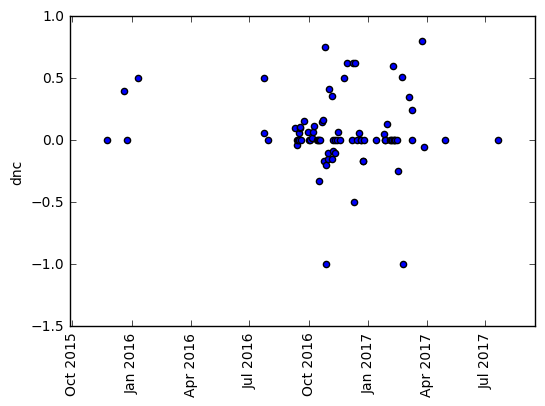

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     11.63
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           0.000721
Time:                        20:14:30   Log-Likelihood:                 217.87
No. Observations:                 363   AIC:                            -431.7
Df Residuals:                     361   BIC:                            -423.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0949      0.023      4.084      0.0

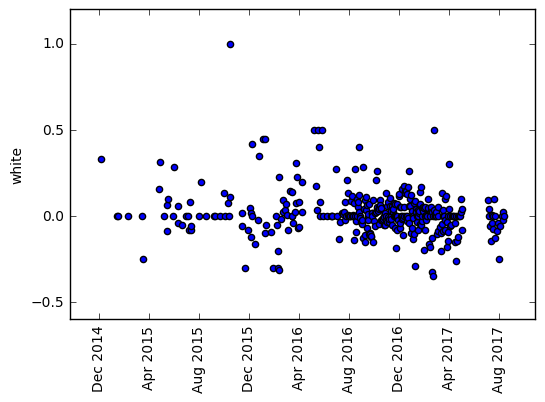

Mean: 0.00603378437686 variance: 0.0407259297686


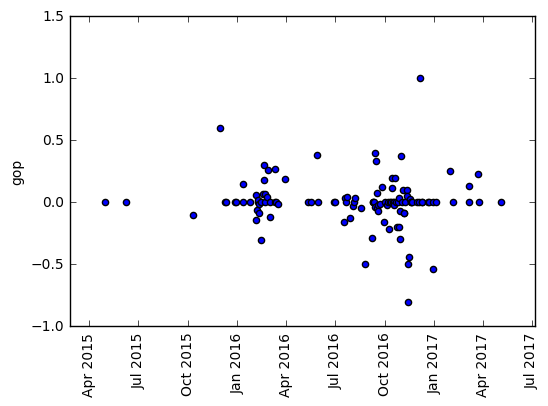

In [20]:
from statsmodels.regression.linear_model import OLS
# TODO: Fit a line to each plot to look for trends over time and plot residuals to make sure the model is valid

def sentiment(word, df):
    tweets = df[df['text'].str.contains(word) == True]
                               
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        analysis = TextBlob(tweet)
        sentiment.append(analysis.sentiment.polarity)
    
    return sentiment

def SentimentWithTime(word):
    tweets = tweets_csv[tweets_csv['text'].str.contains(word) == True]
    
    sent = dict()
    
    for index, date in tweets['created_str'].iteritems():
        sameDate = tweets[tweets['created_str'].str[0:10] ==(date[0:10])]
        slist = date[0:10].split('-')
        sdate = datetime.date(int(slist[0]), int(slist[1]), int(slist[2]))
        if (sdate not in sent):
            sent[sdate] = np.mean(sentiment(word, sameDate))
    
    return sent

def PlotSentimentWithTime(word):
    sent = SentimentWithTime(word)
    
    ordered_sent = sorted(sent.items(), key=lambda x:x[0], reverse=False)
    
    if (len(sent) != 0):
        x_val = [x[0] for x in ordered_sent]
        y_val = [x[1] for x in ordered_sent]
        print("Mean: " + str(np.mean(y_val)) + " variance: " + str(np.var(y_val)))
        plt.scatter(x_val, y_val)
        plt.xticks(rotation=90)
        plt.ylabel(word)
        plt.show()
        
def RegressWord(word):
    sent = SentimentWithTime(word)
    ordered_sent = sorted(sent.items(), key=lambda x:x[0], reverse=False)
    
    if (len(ordered_sent) > 0):
        time0 = ordered_sent[0][0]
    
        X = np.ones(shape=(len(ordered_sent), 2))
        for i in range(0, len(ordered_sent)):
            X[i, 1] = (ordered_sent[i][0] - time0).days
        
        y = np.array([x[1] for x in ordered_sent])
    
        model = OLS(y, X)
        fit = model.fit()
        if (fit.rsquared > 0.01):
            print(fit.summary())

for word in selected:
    RegressWord(word)
    PlotSentimentWithTime(word)